In [1]:
#now replacing github code with my code piece by piece to see where it breaks

In [2]:
import numpy
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [3]:
nx = 41
ny = 41
nt = 500
nit = 50
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
x = numpy.linspace(0, 2, nx)
y = numpy.linspace(0, 2, ny)
X, Y = numpy.meshgrid(x, y)

rho = 1
nu = .1
dt = .001

u = numpy.zeros((nx, ny))
v = numpy.zeros((nx, ny))
p = numpy.zeros((nx, ny)) 
b = numpy.zeros((nx, ny))

In [4]:
def build_up_b(b, rho, dt, u, v, dx, dy):
    
    #my code
    b[1:-1, 1:-1] = rho* ( ((u[2:,1:-1]-u[:-2, 1:-1])/(2*dx)+(v[1:-1,2:]-v[1:-1,:-2])/(2*dy))/dt - ((u[2:,1:-1] - u[0:-2,1:-1]) / (2 * dx))**2 - 2*((u[1:-1,2:]-u[1:-1,:-2])/(2*dy)*(v[2:,1:-1]-v[0:-2,1:-1])/(2 * dx)) - ((v[1:-1,2:]-v[1:-1,:-2])/(2*dy))**2 )
    

    return b

In [5]:
#my code

def boundaryconditions_pressure(p):
    p[0,:] = p[1,:] #dp/dx=0 at x=0
    p[-1,:] = p[-2,:] #dp/dx=0 at x=2
    p[:,0] = p[:,1] #dp/dy=0 at y=0
    p[:,-1] = 0 #p=0 at y=2

    
    return p

#results in runtime error, but this is anticipated based on my step 10 code
normtarget = 1e-4
def pressure_poisson(p, b, dx, dy, normtarget):
    norm = 1
    i = 1
    while(norm > normtarget):
        #update pn
        pn = numpy.empty_like(p)
        pn = p.copy()
        
        #update p
        p[1:-1, 1:-1] = (((pn[2:, 1:-1]+pn[:-2,1:-1])*(dy**2) + (pn[1:-1, 2:]+pn[1:-1,:-2])*(dx**2)) / (2*((dx**2)+(dy**2)))) - ( ((dx**2)*(dy**2)/(2*((dx**2)+(dy**2))))*b[1:-1,1:-1] )
        
        p = boundaryconditions_pressure(p)
        
        norm = numpy.sum(numpy.abs(p[:]) - numpy.abs(pn[:])) / numpy.sum(numpy.abs(pn[:]))
    
    return p

In [6]:
#editing this to switch the y and x coordinates to be ordered x and y, as it is im my code

def cavity_flow(nt, u, v, dt, dx, dy, p, rho, nu):
    un = numpy.empty_like(u)
    vn = numpy.empty_like(v)
    b = numpy.zeros((nx, ny))
    
    for n in range(nt):
        un = u.copy()
        vn = v.copy()
        
        b = build_up_b(b, rho, dt, u, v, dx, dy)
        pressure_poisson(p, b, dx, dy, normtarget)
        
        u[1:-1, 1:-1] = (un[1:-1, 1:-1]-
                         un[1:-1, 1:-1] * dt / dx *
                        (un[1:-1, 1:-1] - un[0:-2,1:-1]) -
                         vn[1:-1, 1:-1] * dt / dy *
                        (un[1:-1, 1:-1] - un[1:-1,0:-2]) -
                         dt / (2 * rho * dx) * (p[2:,1:-1] - p[0:-2,1:-1]) +
                         nu * (dt / dx**2 *
                        (un[2:,1:-1] - 2 * un[1:-1,1:-1] + un[0:-2,1:-1]) +
                         dt / dy**2 *
                        (un[1:-1,2:] - 2 * un[1:-1, 1:-1] + un[1:-1,0:-2])))
        

        v[1:-1,1:-1] = (vn[1:-1, 1:-1] -
                        un[1:-1, 1:-1] * dt / dx *
                       (vn[1:-1, 1:-1] - vn[0:-2,1:-1]) -
                        vn[1:-1, 1:-1] * dt / dy *
                       (vn[1:-1, 1:-1] - vn[1:-1,0:-2]) -
                        dt / (2 * rho * dy) * (p[1:-1,2:] - p[1:-1,0:-2]) +
                        nu * (dt / dx**2 *
                       (vn[2:,1:-1] - 2 * vn[1:-1, 1:-1] + vn[0:-2,1:-1]) +
                        dt / dy**2 *
                       (vn[1:-1,2:] - 2 * vn[1:-1, 1:-1] + vn[1:-1,0:-2])))

        
        u[0,:] = 0
        u[-1,:] = 0
        u[:,0] = 0
        u[:,-1] = 1
        
        v[0,:] = 0
        v[-1,:] = 0
        v[:,0] = 0
        v[:,-1] = 0        
        
    return u, v, p

In [7]:
u = numpy.zeros((nx, ny))
v = numpy.zeros((nx, ny))
p = numpy.zeros((nx, ny))
b = numpy.zeros((nx, ny))
nt = 100
u, v, p = cavity_flow(nt, u, v, dt, dx, dy, p, rho, nu)

<ipython-input-5-59d3479df049>:27: RuntimeWarning: invalid value encountered in double_scalars
  norm = numpy.sum(numpy.abs(p[:]) - numpy.abs(pn[:])) / numpy.sum(numpy.abs(pn[:]))
<ipython-input-5-59d3479df049>:27: RuntimeWarning: divide by zero encountered in double_scalars
  norm = numpy.sum(numpy.abs(p[:]) - numpy.abs(pn[:])) / numpy.sum(numpy.abs(pn[:]))


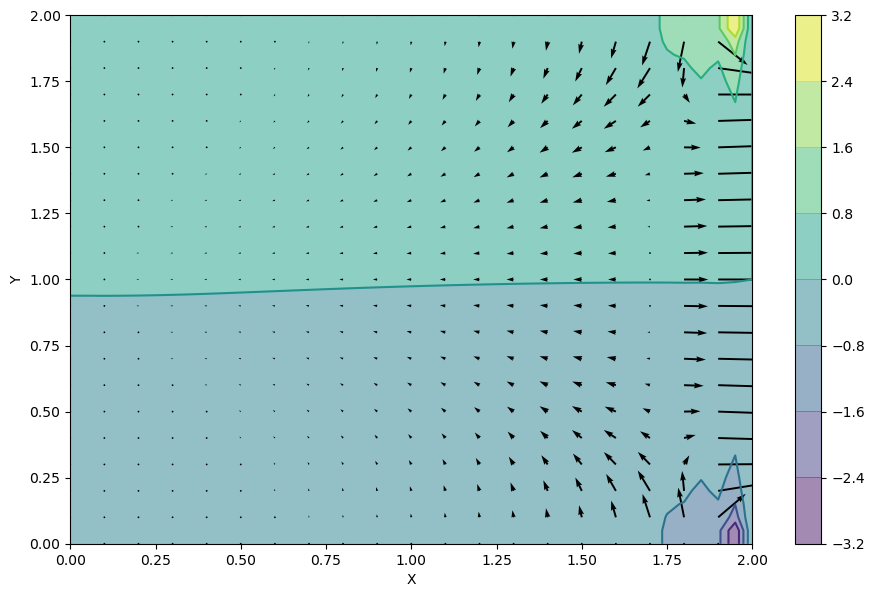

In [8]:
fig = pyplot.figure(figsize=(11,7), dpi=100)
# plotting the pressure field as a contour
pyplot.contourf(X, Y, p, alpha=0.5, cmap=cm.viridis)  
pyplot.colorbar()
# plotting the pressure field outlines
pyplot.contour(X, Y, p, cmap=cm.viridis)  
# plotting velocity field
pyplot.quiver(X[::2, ::2], Y[::2, ::2], u[::2, ::2], v[::2, ::2]) 
pyplot.xlabel('X')
pyplot.ylabel('Y');

In [9]:
u = numpy.zeros((ny, nx))
v = numpy.zeros((ny, nx))
p = numpy.zeros((ny, nx))
b = numpy.zeros((ny, nx))
nt = 700
u, v, p = cavity_flow(nt, u, v, dt, dx, dy, p, rho, nu)

<ipython-input-5-59d3479df049>:27: RuntimeWarning: invalid value encountered in double_scalars
  norm = numpy.sum(numpy.abs(p[:]) - numpy.abs(pn[:])) / numpy.sum(numpy.abs(pn[:]))
<ipython-input-5-59d3479df049>:27: RuntimeWarning: divide by zero encountered in double_scalars
  norm = numpy.sum(numpy.abs(p[:]) - numpy.abs(pn[:])) / numpy.sum(numpy.abs(pn[:]))


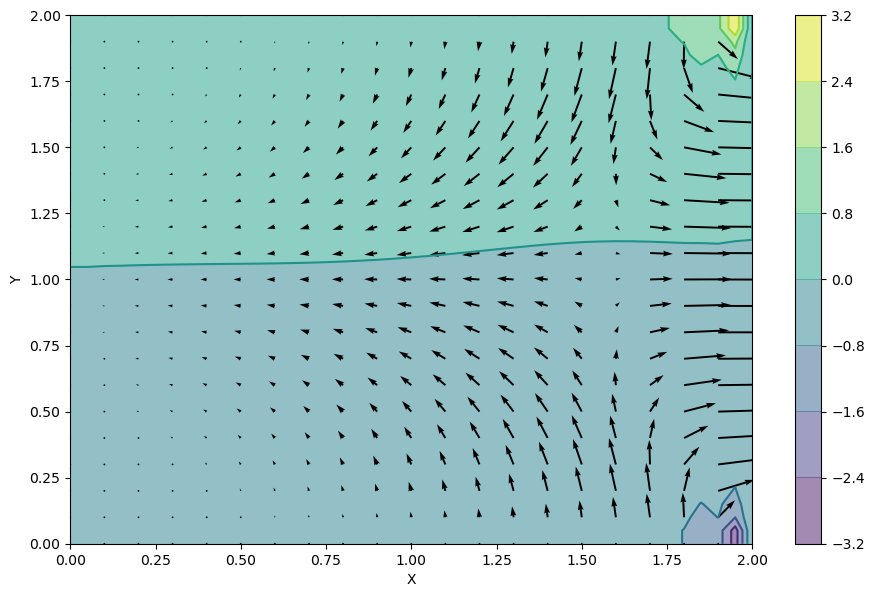

In [10]:
fig = pyplot.figure(figsize=(11, 7), dpi=100)
pyplot.contourf(X, Y, p, alpha=0.5, cmap=cm.viridis)
pyplot.colorbar()
pyplot.contour(X, Y, p, cmap=cm.viridis)
pyplot.quiver(X[::2, ::2], Y[::2, ::2], u[::2, ::2], v[::2, ::2])
pyplot.xlabel('X')
pyplot.ylabel('Y');

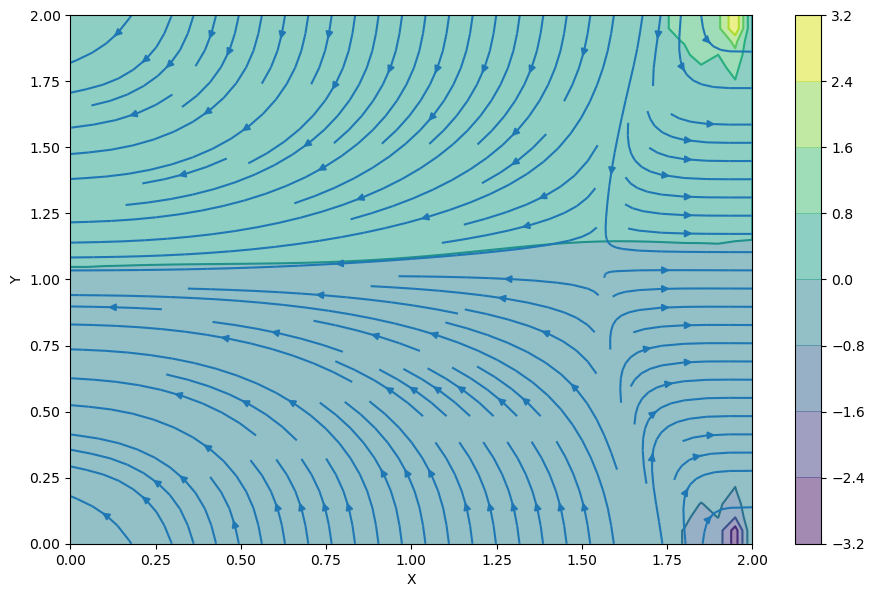

In [11]:
fig = pyplot.figure(figsize=(11, 7), dpi=100)
pyplot.contourf(X, Y, p, alpha=0.5, cmap=cm.viridis)
pyplot.colorbar()
pyplot.contour(X, Y, p, cmap=cm.viridis)
pyplot.streamplot(X, Y, u, v)
pyplot.xlabel('X')
pyplot.ylabel('Y');